In [24]:
import numpy as np
import os
import pandas as pd
import cv2
import random
from IPython.display import display, HTML 
import matplotlib.pyplot as plt

from albumentations import (VerticalFlip, HorizontalFlip, Downscale, Flip, 
                            RandomRotate90, Rotate, ShiftScaleRotate, 
                            CenterCrop, OpticalDistortion, GridDistortion, 
                            ElasticTransform, JpegCompression, HueSaturationValue,
                            Equalize, FancyPCA,GaussianBlur, RandomShadow, Affine,
                            ShiftScaleRotate,
                            RGBShift, RandomBrightness, RandomContrast, Blur, MotionBlur, MedianBlur, GaussNoise, CLAHE, ChannelShuffle, InvertImg, RandomGamma, ToGray, PadIfNeeded 
                           )

WORK_SPACE = "/home/olle/PycharmProjects/LODE/workspace"
DATA_EXT = "feature_segmentation/segmentation/data/train_data/hq_examples"
DATA_PATH = os.path.join(WORK_SPACE, DATA_EXT)

IMG_PATH = os.path.join(DATA_PATH, "images")
MASK_PATH = os.path.join(DATA_PATH, "masks")

img_ids = os.listdir(IMG_PATH)

In [2]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

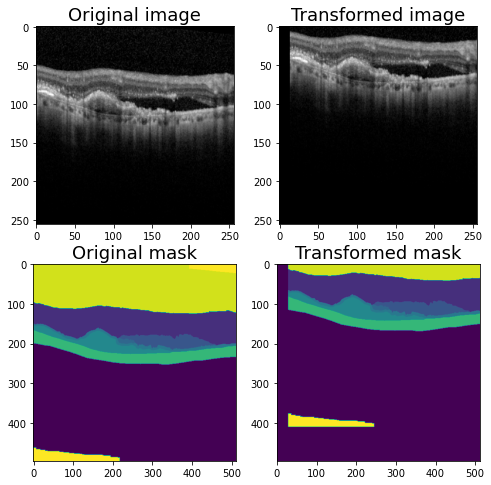

In [52]:
### Spatial-level transforms

# saved settings for augmentations
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.2, brightness_limit=(-0.3, 0.2), contrast_limit=(-0.2, 0.2)),
# Downscale(p=1.0, scale_min=0.6, scale_max=0.6)
# GaussianBlur(p=0.2, blur_limit=(3,3), sigma_limit=2)
# Rotate(p=0.2, interpolation=cv2.INTER_NEAREST)
#ShiftScaleRotate(p=1, shift_limit=0.2, rotate_limit=0,interpolation=cv2.INTER_NEAREST, border_mode=cv2.BORDER_CONSTANT, value=0)

original_height = 512
original_width = 512

transform = A.Compose([])

img_id = img_ids[2]

image_orig = cv2.imread(os.path.join(IMG_PATH, img_id))
image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2RGB)
image_orig = cv2.resize(image_orig, (256, 256))

mask_orig = cv2.imread(os.path.join(MASK_PATH, img_id))[:,:,0]

augmented = transform(image=image_orig, mask=mask_orig)

image_heavy = augmented['image']
mask_heavy = augmented['mask']


visualize(image_heavy, mask_heavy, original_image=image_orig, original_mask=mask_orig)

In [ ]:
plt.imshow(mask_heavy)

In [ ]:
mask